In [265]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, auc,classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import warnings
from sklearn.ensemble import RandomForestClassifier


In [266]:
df = pd.read_csv("../Dataset/data01.csv")

In [267]:
df.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 51 columns]

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [269]:
print('The total number of observations:',df.shape)

The total number of observations: (1177, 51)


In [270]:
df.drop(['group', 'ID'], axis = 1, inplace = True)

In [271]:
df.head()

outcome  age  gendera        BMI  hypertensive  atrialfibrillation  \
0      0.0   72        1  37.588179             0                   0   
1      0.0   75        2        NaN             0                   0   
2      0.0   83        2  26.572634             0                   0   
3      0.0   43        2  83.264629             0                   0   
4      0.0   75        2  31.824842             1                   0   

   CHD with no MI  diabetes  deficiencyanemias  depression  ...  Blood sodium  \
0               0         1                  1           0  ...    138.750000   
1               0         0                  1           0  ...    138.888889   
2               0         0                  1           0  ...    140.714286   
3               0         0                  0           0  ...    138.500000   
4               0         0                  1           0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 49 columns]

In [272]:
# Checking the data types of the data
df.dtypes

outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         float64
Leucocyte                   float64
Platelets                   

Here, all the variables are numerical, including outcome. we will caste that variable to categorical. Also, the gender column has values of 1 and 2, for consistency let us use o and 1 values 

In [273]:
print(df.isnull().sum())

outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophils                   259
Lymphocyte                  145
PT      

Using heatmap for visually representing the presence of missing values in the DataFrame df. Cells with missing values will be colored differently from cells with non-missing values, allowing us to easily identify areas of missing data in our dataset

<Axes: >

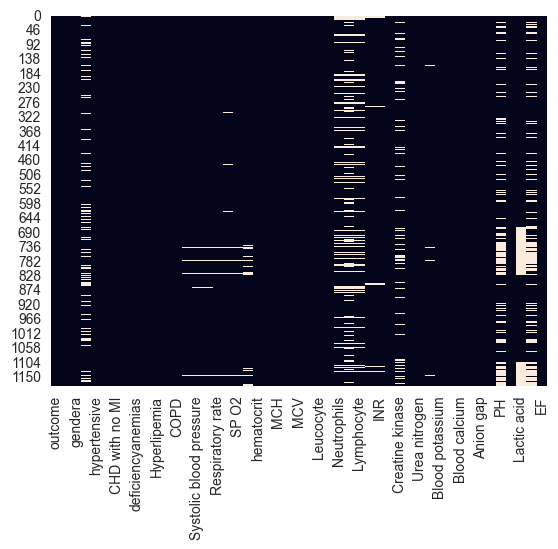

In [274]:
#heatmap showing the null values in the dataframe. 
sns.heatmap(df.isnull(), cbar = False)

Removing all the rows from the DataFrame 'df' where any values is missing . After executing this line, the DataFrame 'df' will be modified to contain only rows that have no missing values across all columns


In [275]:
#Dropping all the rows with the missing values
df = df.dropna(how ='any', axis = 0)

In [276]:
df.isnull().sum()

outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

Counting the number od duplicate rows in the DataFrame 'df'. If the resuly is greater than 0, it indicates that there are duploicate rows present in the DataFrame, Otherwise, if the result is 0, it means there are no duplicate rows. 

In [277]:
#Calculating the number of duplicate rows in the DataFrame 'df'
print("The total number of duplicate value is ", df.duplicated().sum())

The total number of duplicate value is  0


In [278]:
#generating descriptive statistics of the numerical columns in the DataFrame 
df.describe()

outcome         age     gendera         BMI  hypertensive  \
count  428.000000  428.000000  428.000000  428.000000    428.000000   
mean     0.151869   72.514019    1.516355   30.858403      0.703271   
std      0.359314   13.424689    0.500317    9.630081      0.457351   
min      0.000000   35.000000    1.000000   13.673625      0.000000   
25%      0.000000   63.000000    1.000000   24.431441      0.000000   
50%      0.000000   74.000000    2.000000   28.429763      1.000000   
75%      0.000000   84.000000    2.000000   34.460033      1.000000   
max      1.000000   99.000000    2.000000   83.264629      1.000000   

       atrialfibrillation  CHD with no MI    diabetes  deficiencyanemias  \
count          428.000000      428.000000  428.000000         428.000000   
mean             0.422897        0.067757    0.457944           0.336449   
std              0.494598        0.251623    0.498811           0.473047   
min              0.000000        0.000000    0.000000           0.000000   
25%              0.000000        0.000000    0.000000           0.000000   
50%              0.000000        0.000000    0.000000           0.000000   
75%              1.000000        0.000000    1.000000           1.000000   
max              1.000000        1.000000    1.000000           1.000000   

       depression  ...  Blood sodium  Blood calcium    Chloride   Anion gap  \
count  428.000000  ...    428.000000     428.000000  428.000000  428.000000   
mean     0.130841  ...    139.326967       8.448076  102.614122   14.116525   
std      0.337621  ...      3.926662       0.563461    5.200159    2.644287   
min      0.000000  ...    121.045455       6.700000   85.642857    7.777778   
25%      0.000000  ...    137.000000       8.089722   99.305769   12.250000   
50%      0.000000  ...    139.727273       8.440833  102.636364   13.891176   
75%      0.000000  ...    142.000000       8.800000  105.865079   15.673077   
max      1.000000  ...    149.133333      10.950000  117.315789   25.272727   

       Magnesium ion          PH  Bicarbonate  Lactic acid        PCO2  \
count     428.000000  428.000000   428.000000   428.000000  428.000000   
mean        2.135186    7.374790    26.820936     1.900347   45.381160   
std         0.242133    0.065736     5.621605     0.997925   13.019605   
min         1.414286    7.158333    12.857143     0.500000   19.500000   
25%         1.978750    7.330000    23.000000     1.200000   36.958333   
50%         2.100000    7.375778    26.186813     1.660000   42.450000   
75%         2.243506    7.425000    29.750000     2.300000   50.520833   
max         4.072727    7.560000    47.666667     6.725000   98.600000   

               EF  
count  428.000000  
mean    48.154206  
std     13.043058  
min     15.000000  
25%     40.000000  
50%     55.000000  
75%     55.000000  
max     75.000000  

[8 rows x 49 columns]

Comorbidities are pre_existing medical condition that exist alongside the primary condition under consideration. It includes condition like hypertension, diabetes, depression, Chronic Obstructive pulmonary disease(COPD), renal failure and so on

In [279]:
#observing the Correlation of the Comorbidities with dependent variable (I.e.outcome)
cols = ['gendera','hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure', 'COPD','outcome']

corr= df[cols].corr()

<Axes: >

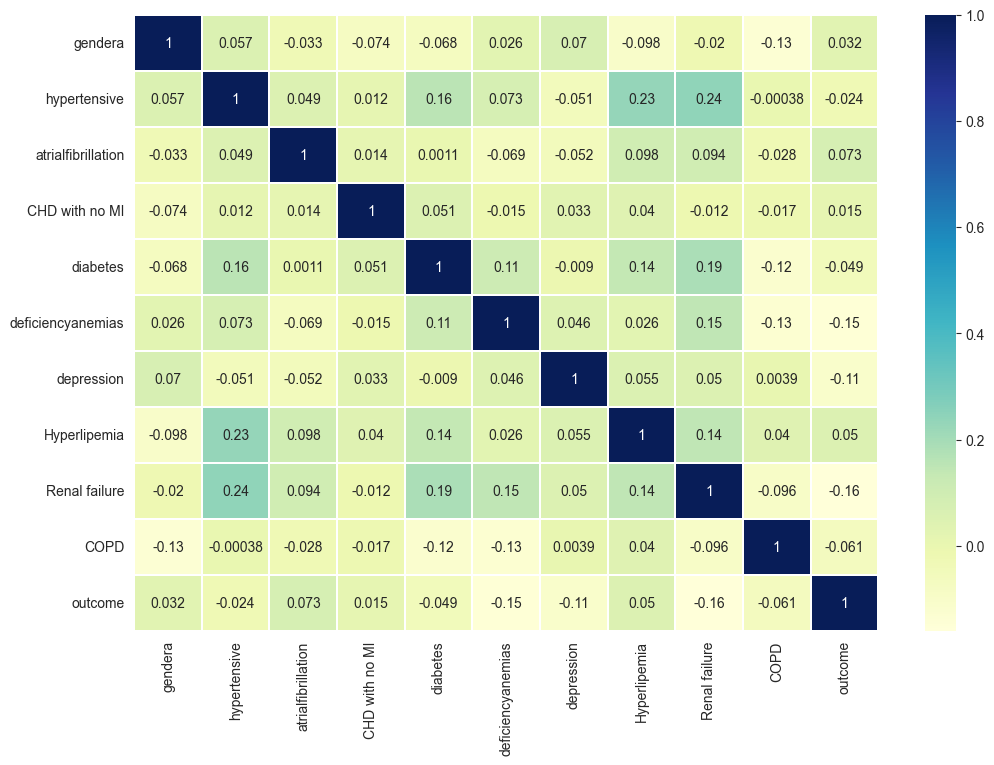

In [280]:
#Visualizing the heatmap where each cell represents the correlation coefficient between two variable. 
plt.figure(figsize =(12,8))
sns.heatmap(corr, annot =True, cmap ='YlGnBu', linewidths = 0.01, linecolor ="white")

The heatmap represents thee correlation cofficient between two variable. The cells are colored according to the colormap('YlGnBu'), with higher correlation coefficients represented by darker shades. Aditionally, the correlation coefficients are annoted within each cell, allowing for easy interpretation of the heatmap

In [281]:
#Counting the total number of age group inside the hospital 
df['age'].value_counts()

age
89    41
84    18
78    15
83    14
72    13
86    13
80    13
66    13
81    13
71    11
64    11
76    11
60    11
69    10
85    10
68    10
77     9
75     9
82     9
79     9
87     8
65     8
67     8
61     8
53     8
74     8
63     8
58     7
73     7
56     7
62     7
57     6
48     6
70     6
88     6
51     5
55     5
54     5
92     3
47     3
52     3
96     3
50     3
46     3
94     2
59     2
35     2
43     2
93     2
37     2
45     2
90     2
91     1
44     1
40     1
49     1
38     1
98     1
99     1
39     1
Name: count, dtype: int64

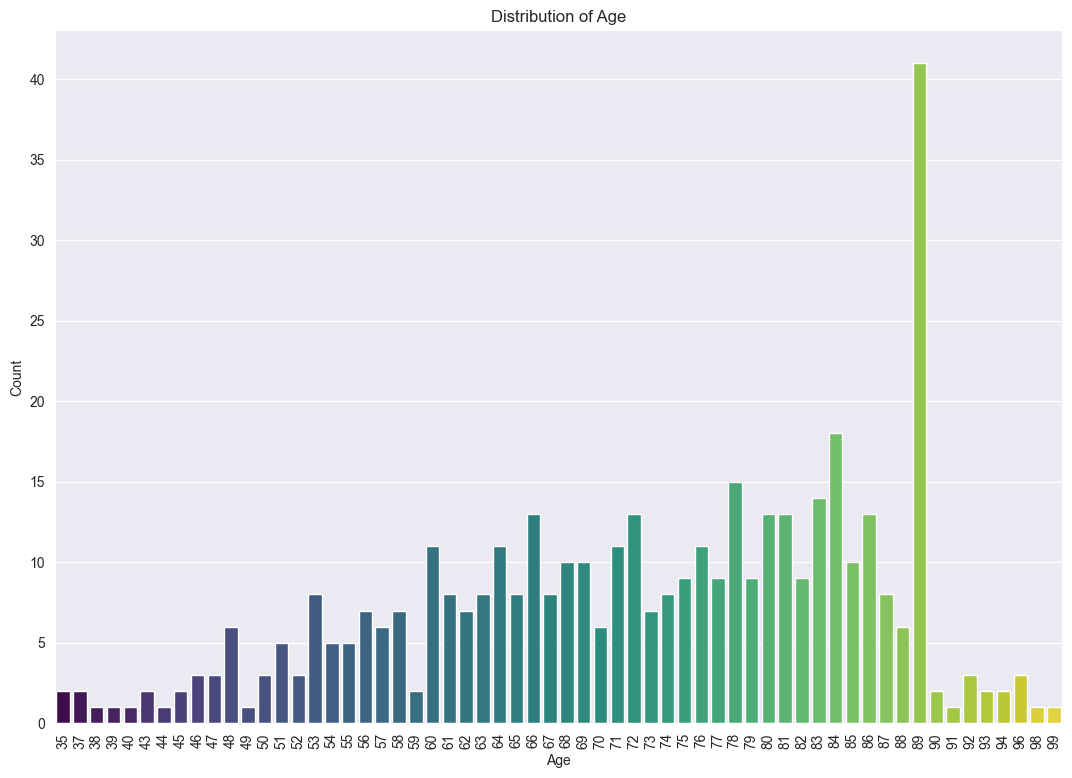

In [282]:
# Create a bar plot with aggregated counts
plt.figure(figsize=(13, 9))
sns.countplot(data=df, x='age', hue='age', palette='viridis', legend=False)
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.xlabel('Age')  # Setting the label for x-axis
plt.ylabel('Count')  # Setting the label for y-axis
plt.title('Distribution of Age')  # Setting the title for the plot
plt.show()

From this visualization we found that 89 age group has highest representation in the hospital setting. This observation reflects the demographic composition of our patient population, which includes a significant proportion of elderly individuals. As age advances, individuals often experience a higher prevalence of chronic health conditions and age-related ailments, leading to increased healthcare needs and hospitalization rates. The prominence of the 89 age group underscores the importance of addressing the unique healthcare requirements of older adults and ensuring the provision of comprehensive medical care tailored to their specific needs and vulnerabilities.

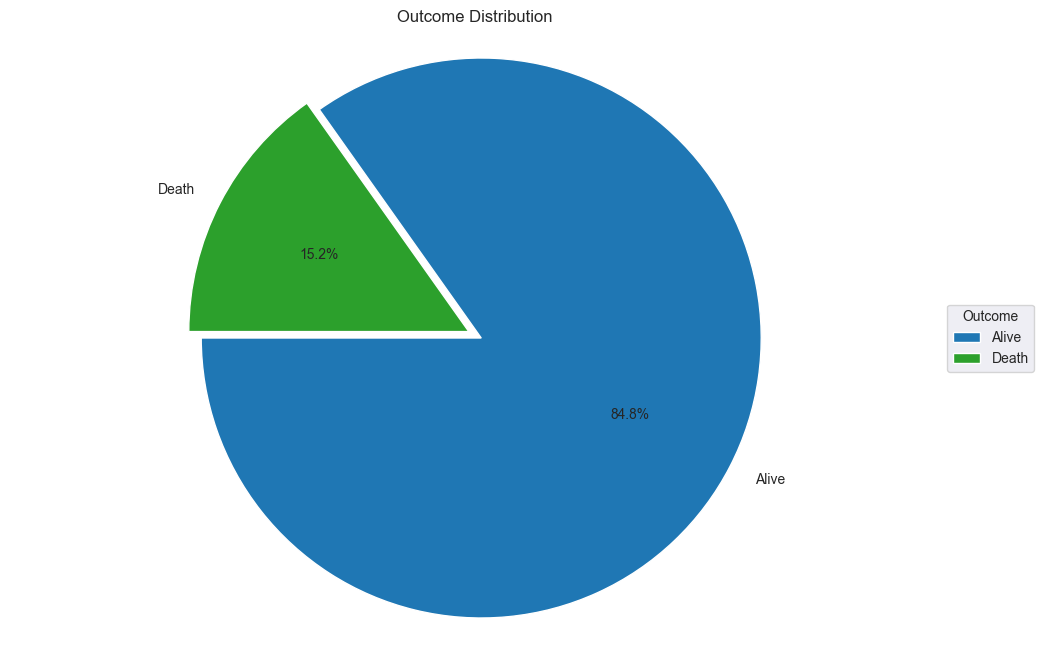

In [283]:
# Define custom colors for the pie chart
colors = ['#1f77b4', '#2ca02c']  # Blue and green colors

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Title of the plot
ax.set_title("Outcome Distribution")

# Create the pie chart with custom colors
wedges, texts, autotexts = ax.pie(df.outcome.value_counts(), explode=(0.025, 0.025), labels=['Alive', 'Death'], colors=colors, autopct='%1.1f%%', startangle=180)

# Add a legend outside the plot
ax.legend(wedges, ['Alive', 'Death'], title='Outcome', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Show the plot
plt.show()

In this pie chart analysis, we observed that more than 15% of patients admitted to the hospital experienced a fatal outcome, while the majority of patients, constituting the remaining percentage, survived their hospitalization. This finding underscores the importance of understanding and addressing the factors contributing to patient mortality, as well as implementing effective interventions aimed at improving patient outcomes and reducing mortality rates. Additionally, it highlights the significance of providing comprehensive and timely medical care to all patients to maximize their chances of recovery and enhance overall healthcare quality within the hospital setting.

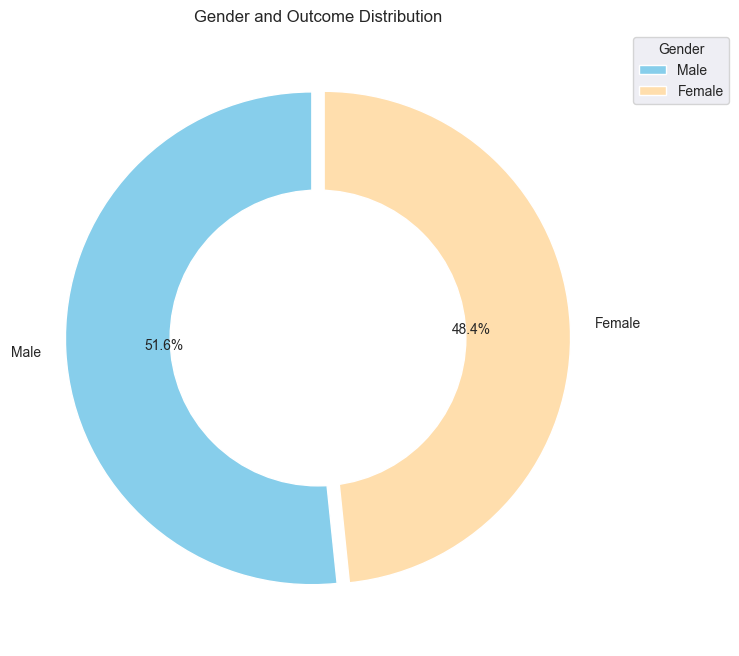

In [284]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create the outer pie chart for gender distribution
outer_labels = ['Male', 'Female']
outer_colors = ['skyblue', 'navajowhite']
outer_explode = (0.025, 0.025)
outer_data = df['gendera'].value_counts()

# Create the outer pie chart
_, _, outer_autotexts = ax.pie(outer_data, labels=outer_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, explode=outer_explode)

# Set up the inner circle (subgroup)
inner_circle = plt.Circle((0, 0), 0.6, color='white')

# Add the inner circle to the plot
ax.add_artist(inner_circle)

# Create the inner pie chart for each subgroup (e.g., outcome)
for i, gender in enumerate(outer_labels):
    inner_data = df[df['gendera'] == gender]['outcome'].value_counts()
    inner_labels = inner_data.index.tolist()
    inner_colors = ['lightcoral', 'lightgreen']

    # Calculate explode values for inner pie chart
    inner_explode = [0.05] * len(inner_data)

    # Draw the inner pie chart
    ax.pie(inner_data, labels=inner_labels, colors=inner_colors, autopct='%1.1f%%', startangle=90, explode=inner_explode, radius=0.75)

# Set the title
plt.title('Gender and Outcome Distribution')

# Add legend for the outer pie chart
ax.legend(outer_labels, title='Gender', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()


From this analysis we can see that 51.6% of male is admitted in a hospital and 48.4 % are female. 

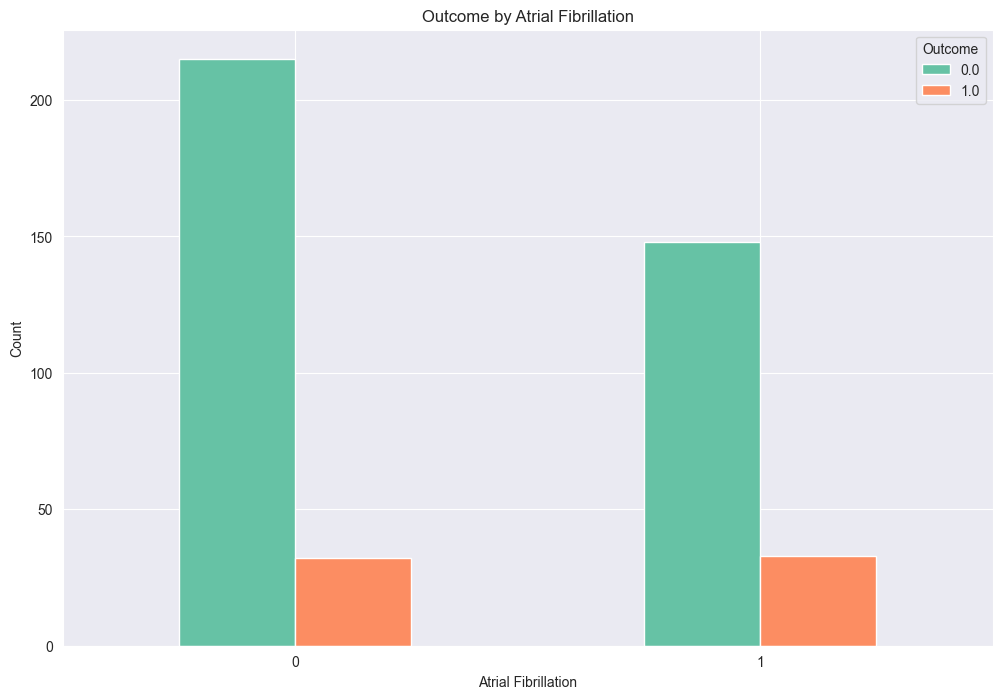

In [285]:
# Calculate the count of outcomes by atrial fibrillation status
outcome_counts = df.groupby(['atrialfibrillation', 'outcome']).size().unstack()

# Plot a grouped bar plot
outcome_counts.plot(kind='bar', figsize=(12, 8), color=['#66c2a5', '#fc8d62'])

# Set plot title and labels
plt.title('Outcome by Atrial Fibrillation')
plt.xlabel('Atrial Fibrillation')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add legend
plt.legend(title='Outcome')

# Show the plot
plt.show()

This Analysis shows a visual representation of how the outcome varies based on the presence or absence of atrial fibrillation. 

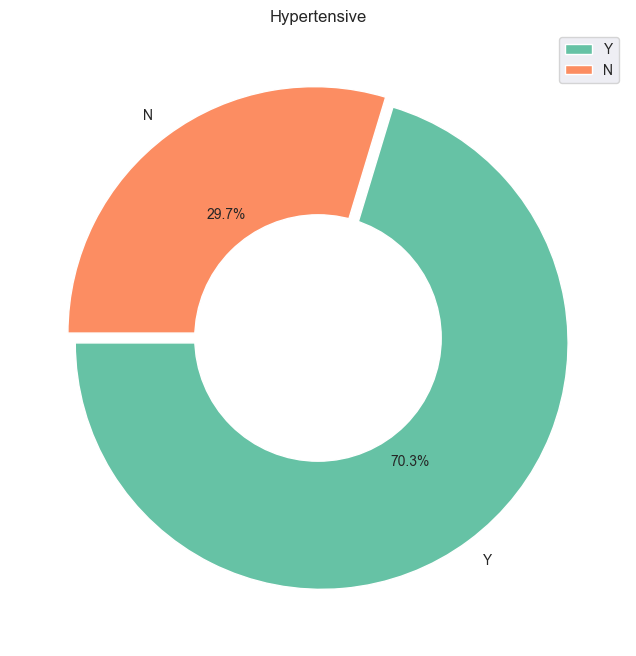

In [286]:
# Define colors for the pie chart
colors = ['#66c2a5', '#fc8d62']

# Set up the figure and axis
plt.figure(figsize=(12, 8))
plt.title("Hypertensive")

# Create the pie chart
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df['hypertensive'].value_counts(), explode=(0.025, 0.025), labels=['Y', 'N'], colors=colors, autopct='%1.1f%%', startangle=180)

# Add legend outside the plot
plt.legend()

# Add circle to the plot
p = plt.gcf()
p.gca().add_artist(circle)

# Show the plot
plt.show()

This analysis shows the total % of people with hypertension and without hypertension.


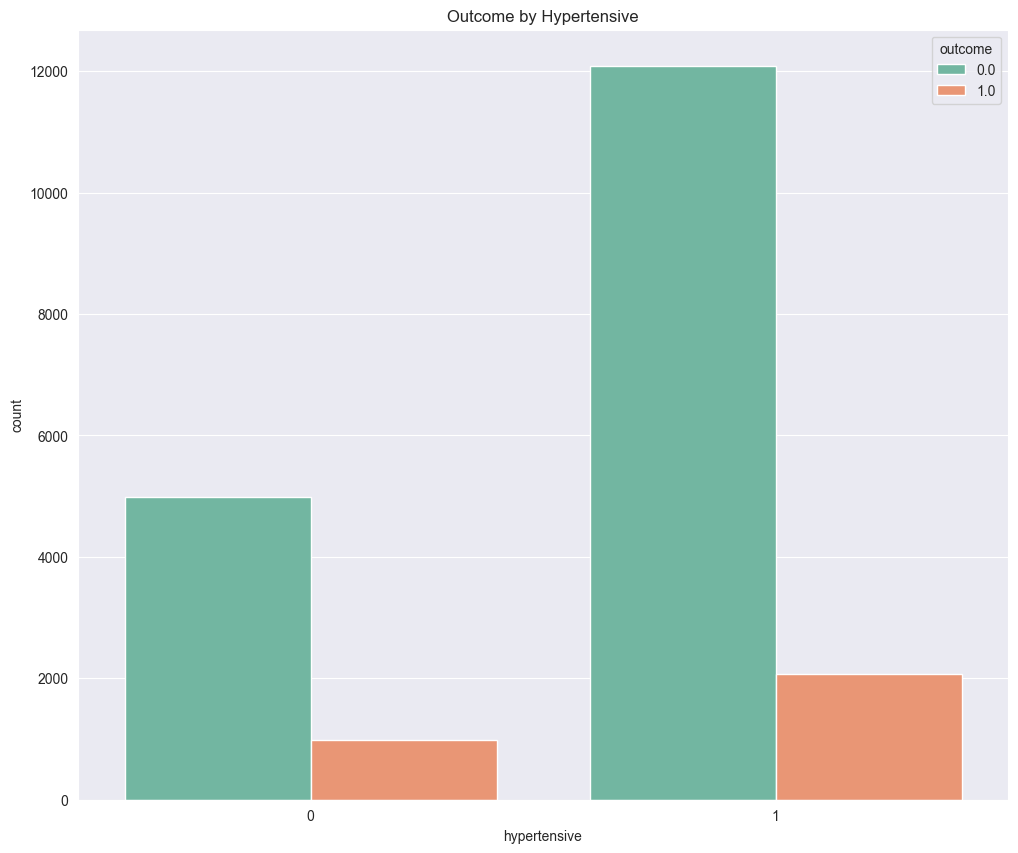

In [287]:
# Reshape the dataframe into long-form format
melted_df = df.melt(id_vars=['hypertensive', 'outcome'], var_name='Variable', value_name='Value')

# Set a new color palette
palette = "Set2"

# Create the countplot
plt.figure(figsize=(12, 10))
sns.countplot(x='hypertensive', hue='outcome', data=melted_df, palette=palette)

# Set title
plt.title("Outcome by Hypertensive")

# Show the plot
plt.show()

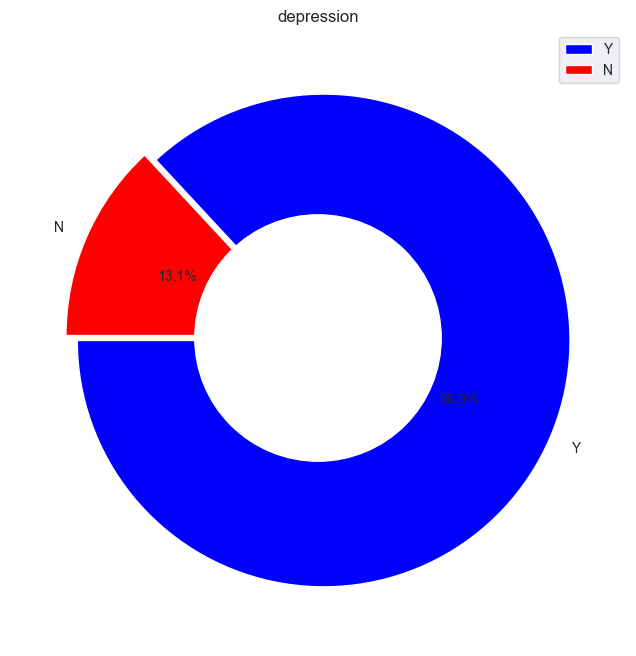

In [288]:
plt.figure(figsize=(12,8))
plt.title("depression")
circle = plt.Circle((0, 0), 0.5, color='white')
g = plt.pie(df.depression.value_counts(), explode=(0.025,0.025), labels=['Y','N'], colors=['b','r'],autopct='%1.1f%%', startangle=180);
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

Overall, this visualization offers a concise and informative overview of the distribution of the depression variable.  Here we can see that *9.9% of total admmited people have depression and the remaining percentage does not have. 

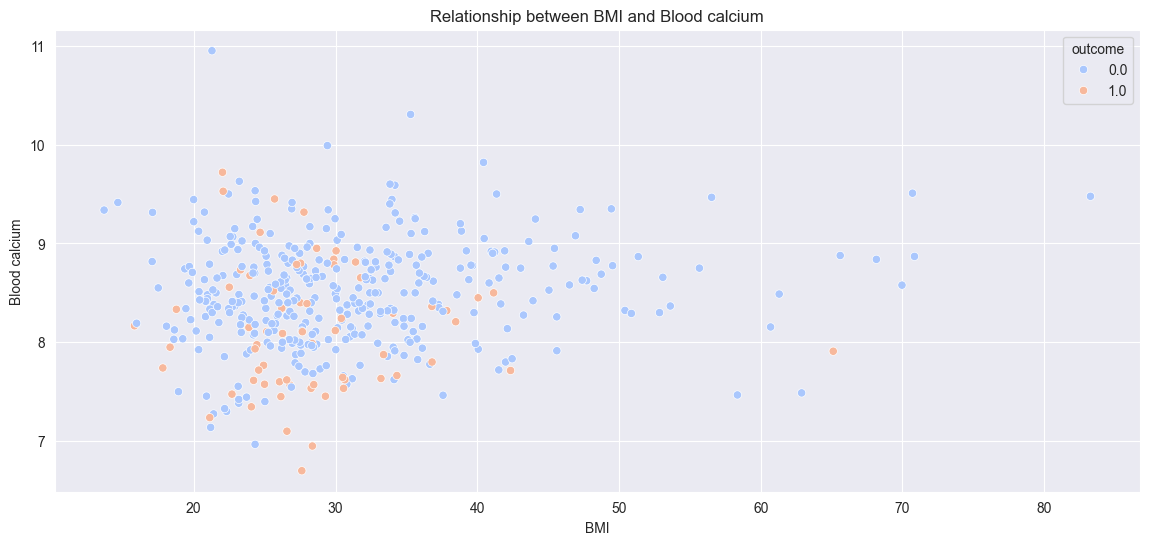

In [289]:
# Set the size of the figure
plt.figure(figsize=(14, 6))

# Create a scatter plot
sns.scatterplot(data=df, x="BMI", y="Blood calcium", hue="outcome", palette="coolwarm")

# Set the title and labels
plt.title("Relationship between BMI and Blood calcium")
plt.xlabel("BMI")
plt.ylabel("Blood calcium")

# Show the plot
plt.show()

scatter plot will effectively visualize the data points and the relationship between 'BMI' and 'Blood calcium', while also providing insight into how different outcomes are distributed within the data.

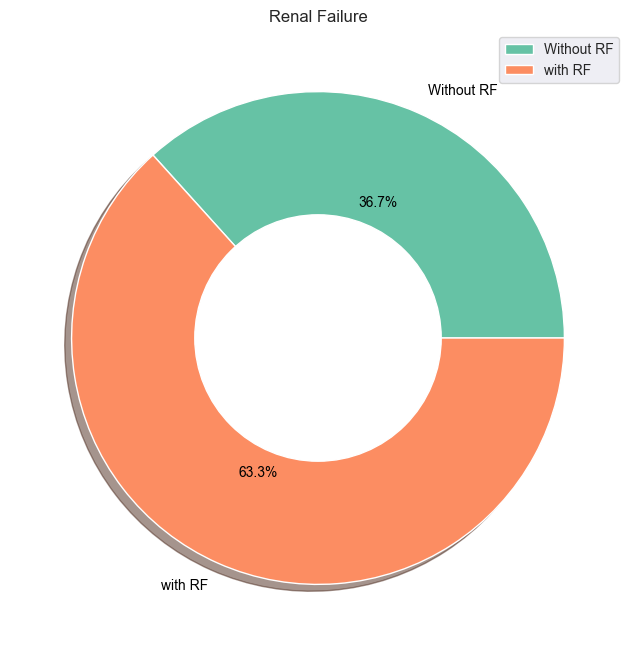

In [290]:
# Define colors
colors = ['#66c2a5', '#fc8d62']

# Create pie chart
plt.figure(figsize=(12, 8))
circle = plt.Circle((0, 0), 0.5, color='white')
plt.pie(df['Renal failure'].value_counts(sort=False), autopct='%1.1f%%', shadow=True, labels=['Without RF', 'with RF'],
        colors=colors, textprops={'color':'black'}, rotatelabels=False)
plt.title('Renal Failure')
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

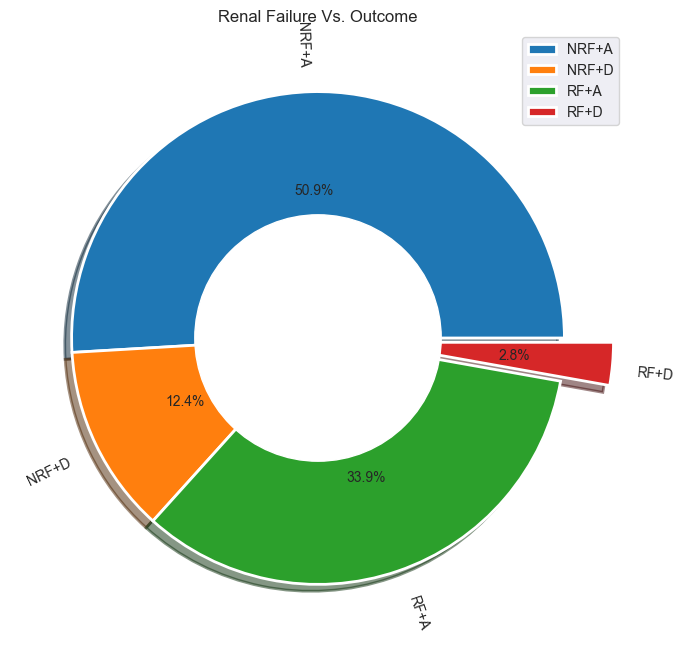

In [291]:
plt.figure(figsize=(12,8))
circle = plt.Circle((0, 0), 0.5, color='white')
plt.pie(df.groupby(['Renal failure', 'outcome']).outcome.count(), autopct='%1.1f%%', shadow=True,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        labels = ['NRF+A', 'NRF+D', 'RF+A', 'RF+D'],
        explode=(0,0,0,0.2), rotatelabels=True)
plt.title('Renal Failure Vs. Outcome')
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

From this pie chart visualization, we can observe the distribution of different outcomes (Alive and Death) among individuals categorized by the presence or absence of renal failure (RF).

NRF+A: Represents individuals without renal failure (No RF) who are Alive (A).
NRF+D: Represents individuals without renal failure (No RF) who are Dead (D).
RF+A: Represents individuals with renal failure (RF) who are Alive (A).
RF+D: Represents individuals with renal failure (RF) who are Dead (D).

Overall, this visualization allows for a quick understanding of the distribution of outcomes based on the presence or absence of renal failure, providing insights into the association between renal failure and mortality within the dataset.

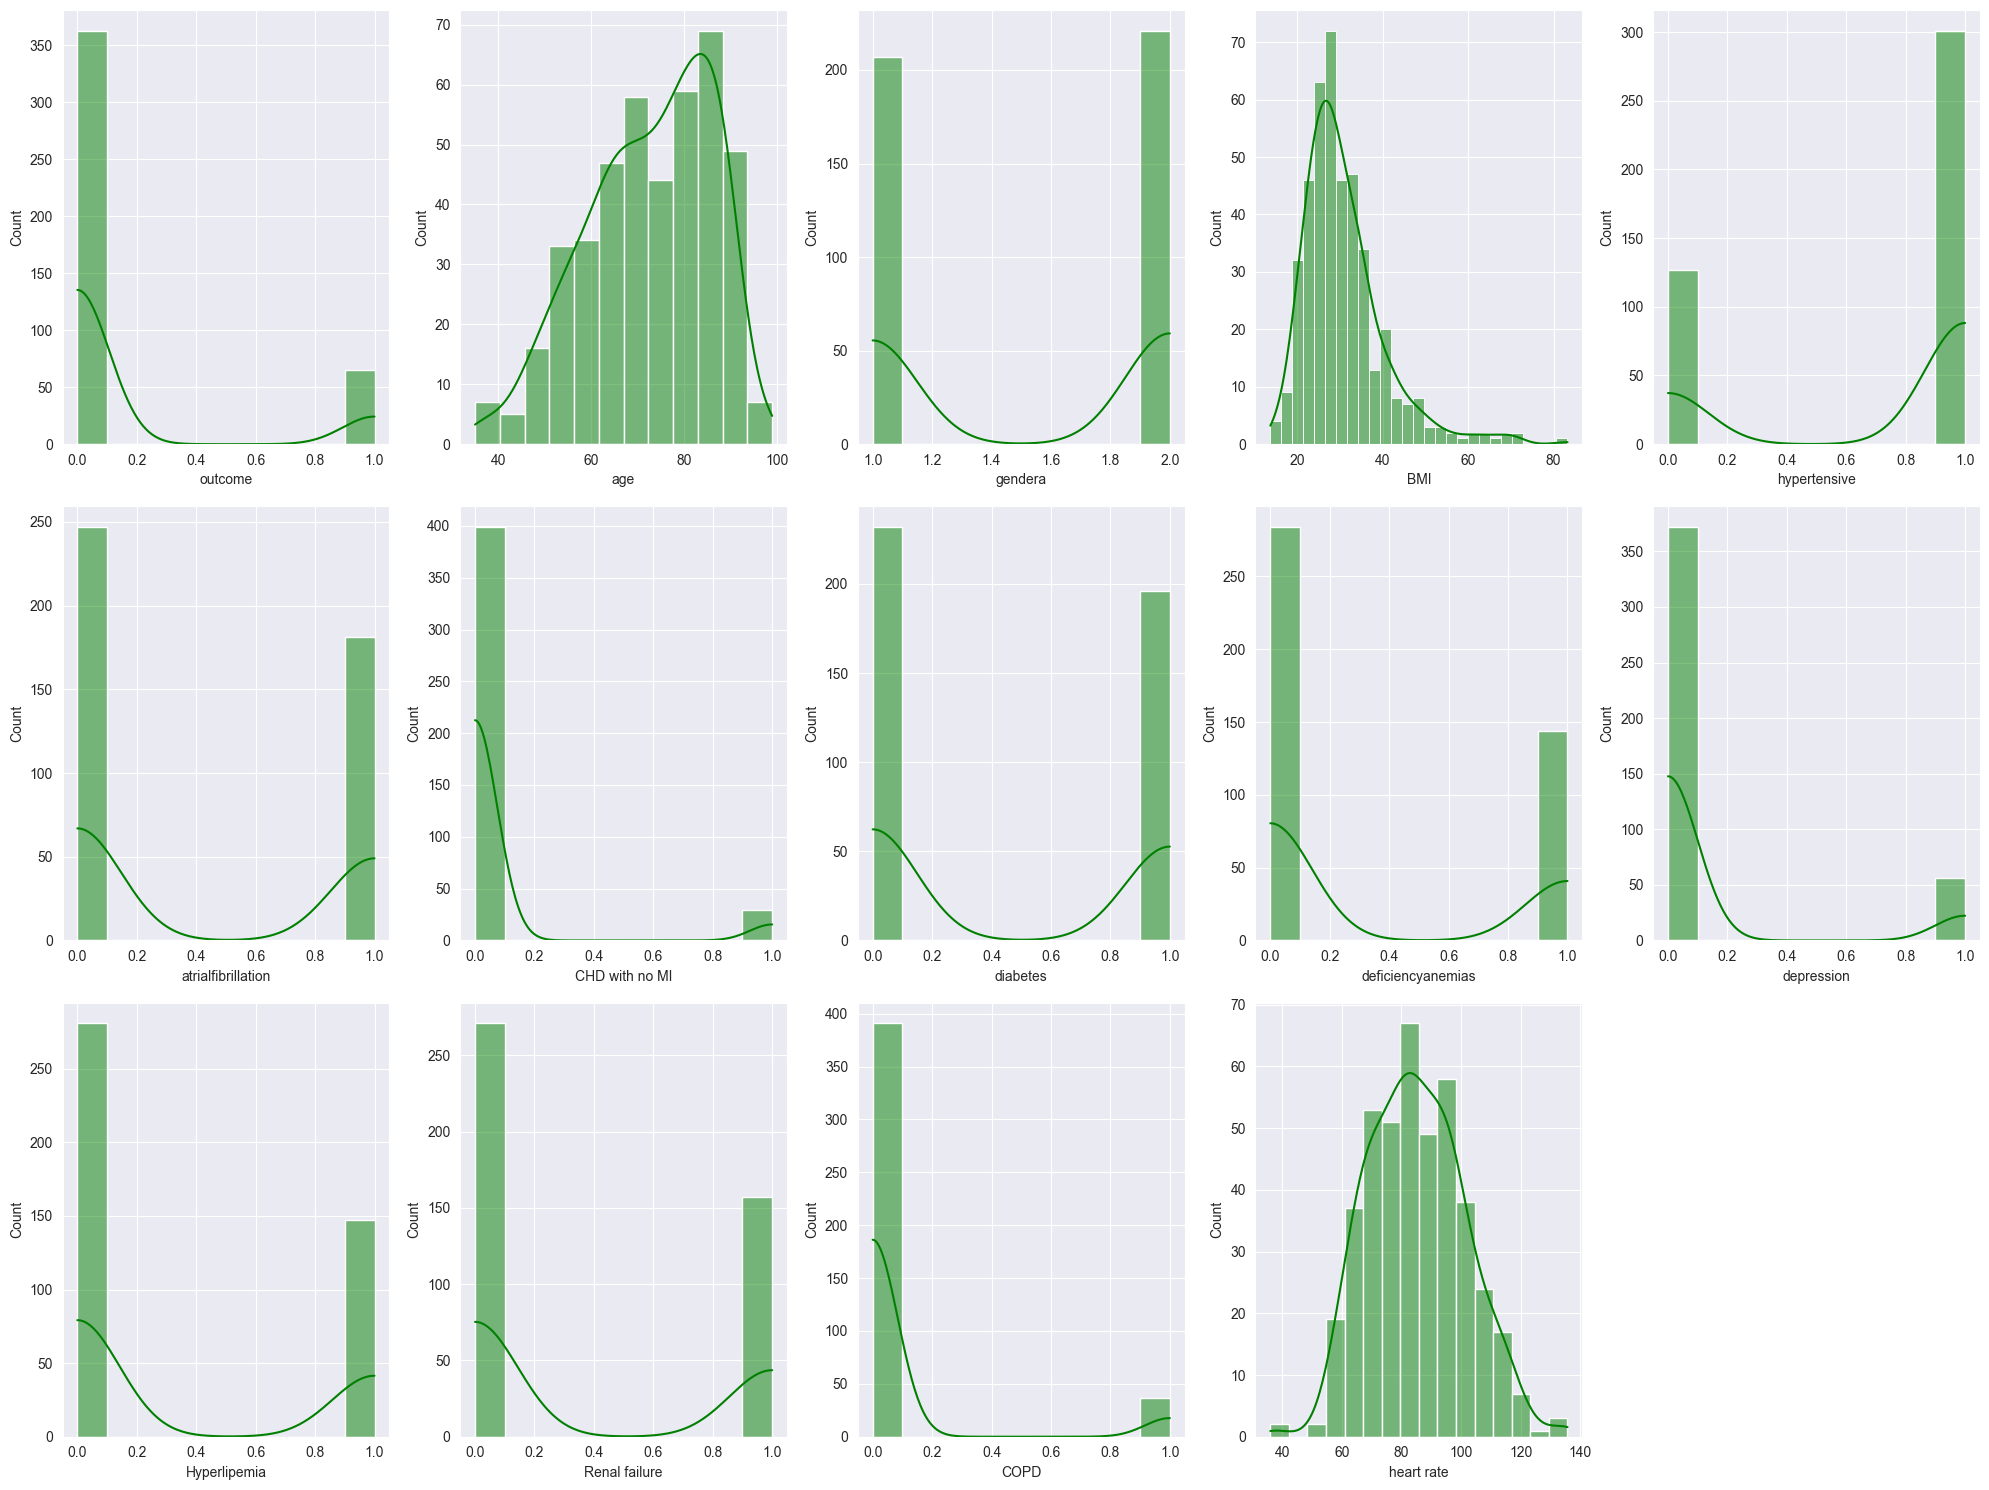

In [292]:
plt.figure(figsize=(20, 15))
plotnumber = 1
for column in df.columns:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], color='green', kde=True)  # Use displot for figure-level distribution plot
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

lets drop the outcome or result to proceed further with training and testing the model

In [293]:
#Using Machine Learning
X = df.drop('outcome', axis=1)
Y = df['outcome']

**Split Train Test Data**
Lets create a pipeline for training and evaluating a logistic regression model using scikit-learn.
Firstly, lets split data into training and testing sets using the train_test_split function. 
Then, a lets create a pipeline for logistic regression, comprising a standard scaler for feature scaling and logistic regression for classification.

In [294]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Lets fit pipeline to the training data. then, subsequently, lets make predictions on the testing set, and evaluate the accuracy of the model using accuracy_score function, this will help provide insights into its performance.

In [295]:
# Creating pipelines for logistic regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

In [296]:
#Fitting the pipeline on the training data
logreg_pipeline.fit(X_train, y_train)

Time To predict!

In [297]:
#Predicting using both models
y_pred_train_logreg = logreg_pipeline.predict(X_train)
y_pred_test_logreg = logreg_pipeline.predict(X_test)

Finally, both the accuracy on the training and testing sets are calculated and displayed, offering insights into the model's generalization performance.

In [298]:
# Step 5: Model evaluation - Accuracy
accuracy_train_logreg = accuracy_score(y_train, y_pred_train_logreg)
accuracy_test_logreg = accuracy_score(y_test, y_pred_test_logreg)

print("Accuracy for Logistic Regression (Training):", accuracy_train_logreg)
print("Accuracy for Logistic Regression (Testing):", accuracy_test_logreg)

Accuracy for Logistic Regression (Training): 0.9239766081871345
Accuracy for Logistic Regression (Testing): 0.8953488372093024



Training Accuracy (0.92) is higher than Testing Accuracy (0.89), which is reasonable to proceed with the model further however it indicates some degree of overfitting. This gap isn't substantial, but it suggests the model might be fitting noise in the training data.

Let's set up a logistic regression pipeline with L1 regularization for feature selection. This involves scaling the data using StandardScaler and then applying logistic regression with L1 penalty using the 'liblinear' solver. Let's define hyperparameters for grid search, specifically adjusting the regularization strength (C) to find the optimal value for the model.




In [299]:
# Define logistic regression pipeline for L1 regularization
logreg_pipeline_l1 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
])
# Define hyperparameters for grid search for L1 regularization
logreg_hyperparameters = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
}


lets use grid search for L1 regularization to find the best hyperparameters for our logistic regression model. By doing this, we can find the best combination of hyperparameters that maximizes our model's accuracy.

Once we've identified the optimal hyperparameters, we'll fit our logistic regression pipeline using those settings on our training data. Then, we'll evaluate the performance of our model on both the training and testing datasets separately.

By comparing the accuracies on training and testing data, we'll get a sense of how well our model generalizes to new, unseen data. This step is crucial to solve overfitting.

In [300]:
# Perform grid search for L1 regularization
grid_search = GridSearchCV(logreg_pipeline_l1, logreg_hyperparameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Fit pipeline on training data with best hyperparameters for L1 regularization
logreg_pipeline_l1.fit(X_train, y_train)
#get train accuracy 
y_pred_train_l1 = logreg_pipeline_l1.predict(X_train)
accuracy_train_l1 = accuracy_score(y_train, y_pred_train_l1)

# Evaluate model on testing data for L1 regularization
y_pred_l1 = logreg_pipeline_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
# Print results for L1 regularization
print("Results for Logistic Regression with L1 regularization:")
print("Training accuracy:", accuracy_train_l1)
print("Testing accuracy:", accuracy_l1)

Results for Logistic Regression with L1 regularization:
Training accuracy: 0.9239766081871345
Testing accuracy: 0.8837209302325582


L1 did not give much difference in accuracy but that was worth giving a shot, lets see classification report and roc score. 

In [301]:
classification_rep_l1 = classification_report(y_test, y_pred_l1)
print("Classification report:")
print(classification_rep_l1)

Classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93        72
         1.0       0.70      0.50      0.58        14

    accuracy                           0.88        86
   macro avg       0.80      0.73      0.76        86
weighted avg       0.87      0.88      0.88        86


Precision:
The precision for predicting mortality (class 0) is high at 0.91, indicating that when the model predicts a patient will survive, it's correct approximately 91% of the time. This suggests that the model is effective at minimizing false positive predictions of mortality, which is crucial in ensuring that patients are not unnecessarily flagged as at risk when they are not.However, the precision for predicting mortality (class 1) is relatively lower at 0.70. This indicates that when the model predicts mortality, it's correct around 70% of the time. While this precision is still reasonable, it suggests there is room for improvement in correctly identifying patients who are at risk of mortality.

Recall:
The recall for predicting mortality (class 0) is high at 0.96, meaning that the model effectively identifies around 96% of patients who actually have a risk of mortality. This suggests that the model is sensitive to detecting patients who are truly at risk, which is crucial for timely interventions and patient care.
However, the recall for predicting mortality (class 1) is relatively lower at 0.50. This indicates that the model only identifies around 50% of patients who actually experience mortality. Improving this metric is important as it ensures that no patients at risk of mortality are missed by the model.

F1-score:
The F1-score for predicting mortality (class 0) is high at 0.93, indicating a good balance between precision and recall for this class. This suggests that the model performs well in correctly identifying patients at risk of mortality without producing too many false positive predictions.
However, the F1-score for predicting mortality (class 1) is relatively lower at 0.58, suggesting that there's an imbalance between precision and recall for this class. This highlights the need for further optimization to improve the model's ability to detect patients at risk of mortality.
In summary, while the model demonstrates strong performance in predicting survival (class 0), there is room for improvement in predicting mortality (class 1). Specifically, efforts should focus on increasing the precision and recall for predicting mortality to ensure that the model effectively identifies and prioritizes patients who are at risk, thereby facilitating timely interventions and improving patient outcomes.

In [302]:
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)
print("Confusion matrix:")
print(conf_matrix_l1)

Confusion matrix:
[[69  3]
 [ 7  7]]


In [303]:
roc_auc_l1 = roc_auc_score(y_test, logreg_pipeline_l1.predict_proba(X_test)[:, 1])
print("ROC-AUC score:", roc_auc_l1)

ROC-AUC score: 0.8849206349206349


In [304]:
# Pipeline for Logistic Regression with regularization (L2)
logreg_pipeline_l2 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2', solver='lbfgs', random_state=42))
])

In [305]:
# GridSearchCV for Logistic Regression with L2 regularization
grid_search_l2 = GridSearchCV(logreg_pipeline_l2, logreg_hyperparameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_l2.fit(X_train, y_train)

# Fit the pipeline on the training data with best hyperparameters
logreg_pipeline_l2.set_params(**grid_search_l2.best_params_)
logreg_pipeline_l2.fit(X_train, y_train)
# Training accuracy
y_train_pred_logreg_l2 = logreg_pipeline_l2.predict(X_train)
training_accuracy_logreg_l2 = accuracy_score(y_train, y_train_pred_logreg_l2)
# Predictions for testing data
y_pred_logreg_l2 = logreg_pipeline_l2.predict(X_test)
# Testing accuracy
accuracy_logreg_l2 = accuracy_score(y_test, y_pred_logreg_l2)
# Print results
print("Training Accuracy for Logistic Regression with L2 regularization:", training_accuracy_logreg_l2)
print("Testing Accuracy for Logistic Regression with L2 regularization:", accuracy_logreg_l2)

Training Accuracy for Logistic Regression with L2 regularization: 0.9122807017543859
Testing Accuracy for Logistic Regression with L2 regularization: 0.8837209302325582


In [306]:
# Additional evaluation metrics - classification report
classification_report_logreg_l2 = classification_report(y_test, y_pred_logreg_l2)
print("Classification Report for Logistic Regression with L2 regularization (Testing):")
print(classification_report_logreg_l2)

Classification Report for Logistic Regression with L2 regularization (Testing):
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93        72
         1.0       0.83      0.36      0.50        14

    accuracy                           0.88        86
   macro avg       0.86      0.67      0.72        86
weighted avg       0.88      0.88      0.86        86


In [307]:
# Confusion matrix
confusion_matrix_logreg_l2 = confusion_matrix(y_test, y_pred_logreg_l2)
print("Confusion Matrix for Logistic Regression with L2 regularization (Testing):")
print(confusion_matrix_logreg_l2)

Confusion Matrix for Logistic Regression with L2 regularization (Testing):
[[71  1]
 [ 9  5]]


In [308]:
# ROC-AUC score for logistic regression with L2 regularization
roc_auc_logreg_l2 = roc_auc_score(y_test, logreg_pipeline_l2.predict_proba(X_test)[:, 1])
print("ROC-AUC Score for Logistic Regression with L2 regularization:", roc_auc_logreg_l2)

ROC-AUC Score for Logistic Regression with L2 regularization: 0.8859126984126984


In conclusion, L2 regularization outperformed L1 regularization in precision for predicting mortality while maintaining comparable accuracy and F1-scores. This is crucial for minimizing false positive predictions, identifying all patients at risk, and ensuring timely interventions, aligning closely with the objectives of our project.lets create our final predictive model with l2 regularization


Lets predict on the train and test data using our optimized model with  l2 regularization model.

In [309]:
#Predicting using both train and test data using l2
y_pred_train_logreg_l2 = logreg_pipeline_l2.predict(X_train)
y_pred_test_logreg_l2 = logreg_pipeline_l2.predict(X_test)

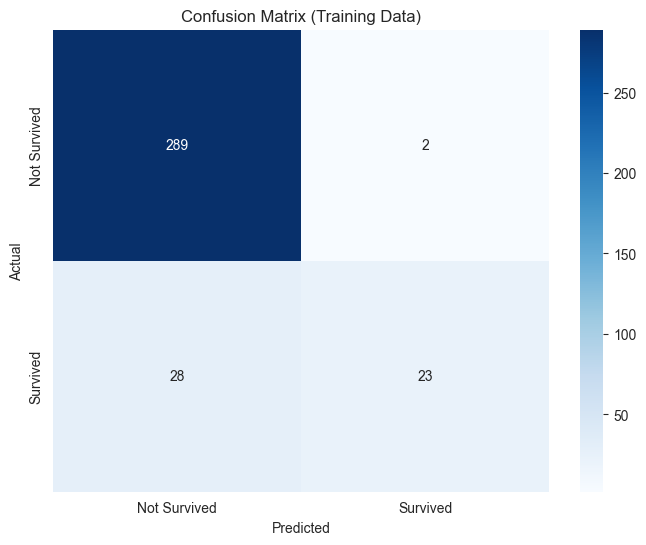

In [310]:
# Calculate confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_pred_train_logreg_l2)

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training Data)')
plt.show()

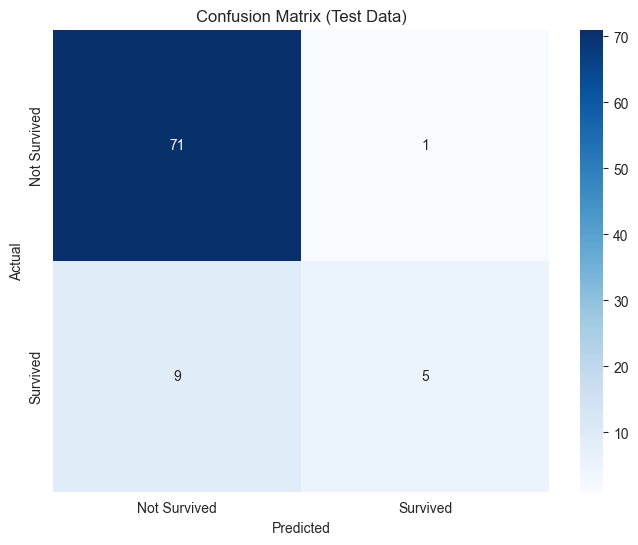

In [311]:
# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_logreg_l2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Data)')
plt.show()

Lets try using manual data for prediction to show the result on if the patient will be likely 	to survive or not. 

In [312]:
#lets predict on new unseen random data as well
# Manual data
manual_data = np.array([[ 70, 1, 27.58817943, 1, 1, 0, 0, 1, 0, 0, 1, 0, 68.83783784, 155.8666667, 68.33333333, 16.62162162, 36.71428571, 98.39473684, 2155, 26.27272727, 2.96, 28.25, 31.52, 89.9, 16.22, 7.65, 305.1, 74.65, 0.4, 13.3, 10.6, 1, 1956, 148, 1.958333333, 50, 114.6363636, 4.816666667, 138.75, 7.463636364, 109.1666667, 13.16666667, 2.618181818, 7.23, 21.16666667, 0.5, 40, 55]])

# Predict using the trained model
predictions = logreg_pipeline_l2.predict(manual_data)
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Print predictions
for i, pred in enumerate(predictions):
    if pred == 0:
        print(f"Patient {i+1} is likely to survive")
    else:
        print(f"Patient {i+1} is likely to die")

Patient 1 is likely to survive
